# Exploratory Data Analysis on Medical Side Effects Dataset

### Project Summary:

In this project, we will perform an Exploratory Data Analysis (EDA) and Data Pre-Processing on a medical dataset that includes information on users, their medications, side effects, and various health-related attributes. The goal of the EDA phase is to explore the structure of the data, detect any anomalies or missing values, and uncover patterns and relationships between the variables using visualizations. This will provide valuable insights before moving to the data preprocessing and model-building phases. Based on the findings from EDA, we will clean and preprocess the data to make it ready for modeling.


### 1. Importing Libraries and Loading the Data

In this step, we import the necessary Python libraries for data analysis and visualization, such as `pandas`, `matplotlib`, and `seaborn`. We will also load the dataset into a pandas DataFrame to begin exploring it.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the dataset 
df = pd.read_excel('side_effect_data 1.xlsx')

# Display the first few rows 
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


### 2. Basic Information About the Dataset

We will now gather basic information about the dataset, such as column names, data types, and missing values. This will help us understand the structure and cleanliness of the data.


In [3]:
# Get information about the dataset
df.info()

# Check for missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

### 3. Summary Statistics of the Data

This step involves generating summary statistics to understand the central tendency, spread, and shape of the numeric columns. Additionally, we provide summary statistics for categorical columns.


In [4]:
# Generate summary statistics for numeric columns
df.describe()

# For categorical columns
df.describe(include='object')

,Cinsiyet,Uyruk,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu
count,1579,2357,2130,2357,2357,1873,1965,2201,2140,2260,2236,2010
unique,2,1,13,151,22,28,80,92,84,85,90,8
top,Female,Turkiye,Adana,chlordiazepoxide-amitriptyline,Agizda Farkli Bir Tat,Domates,"Alzheimer, Diger","Alzheimer, Diyabet","Alzheimer, Astim",,,AB RH-
freq,872,2357,220,29,229,118,61,64,110,168,136,421


### 4. Visualizing Missing Data

Here, we will visualize the missing data in the dataset using a heatmap. This will allow us to easily identify which columns contain missing values and the extent of the missing data.

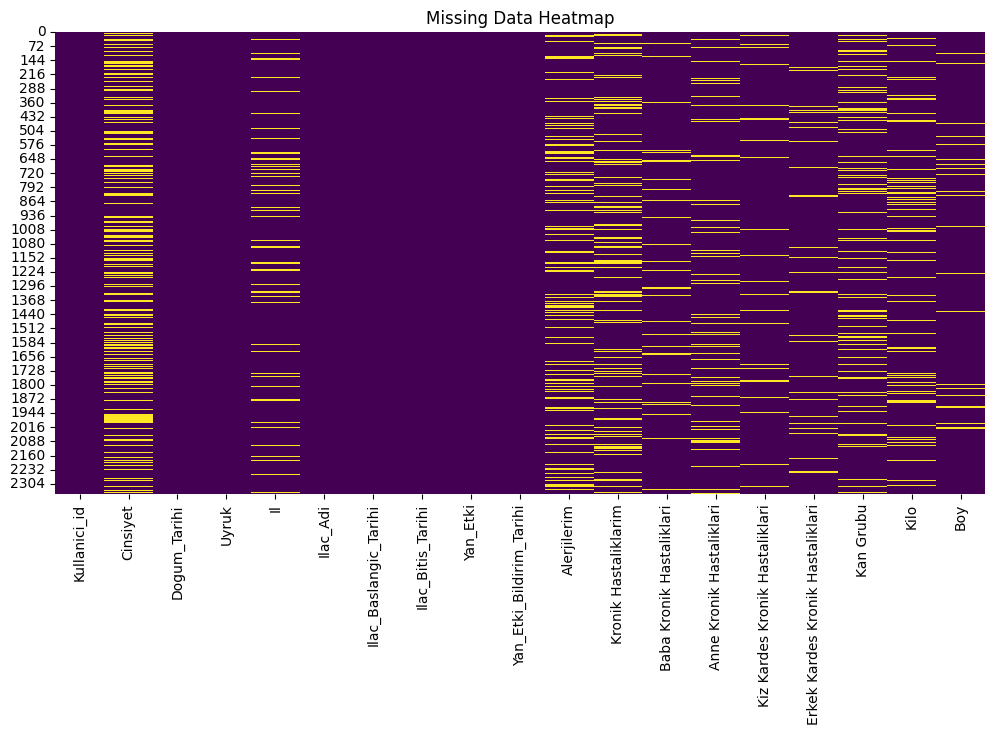

In [5]:
# Visualize missing data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

### 5. Gender Distribution

We will visualize the distribution of gender (`Cinsiyet`) in the dataset to get an understanding of the gender balance in the sample. Missing values will be handled by categorizing them as "Unknown."

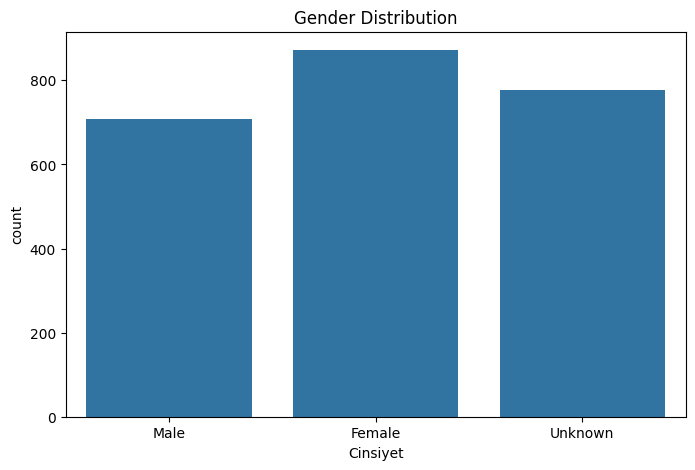

In [6]:
# Handling missing values in 'Cinsiyet' column for visualization
df['Cinsiyet'] = df['Cinsiyet'].fillna('Unknown')

# Plot the distribution of gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Cinsiyet', data=df)
plt.title('Gender Distribution')
plt.show()

### 7. Correlation Heatmap for Numeric Variables

We explore the relationships between numeric variables using a correlation heatmap. This will help us identify any strong correlations between variables such as height, weight, and time-related columns.

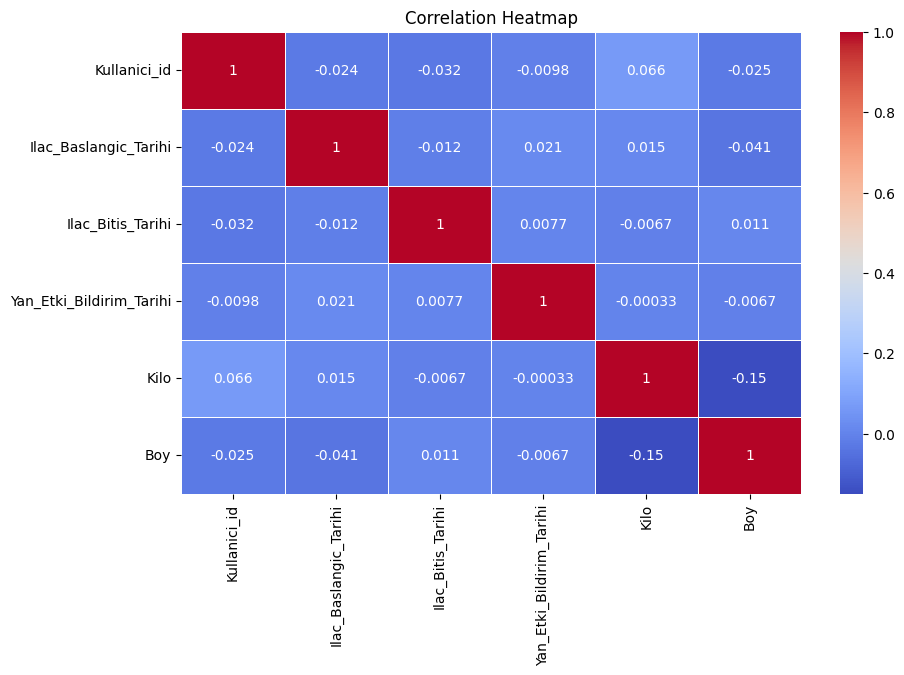

In [7]:
# Selecting numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'datetime64']).drop(columns=['Dogum_Tarihi'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 8. Exploring Relationships Between Variables (Scatter Plot)

In this step, we examine the relationship between height (`Boy`) and weight (`Kilo`) using a scatter plot. This can reveal patterns or clusters in the data.

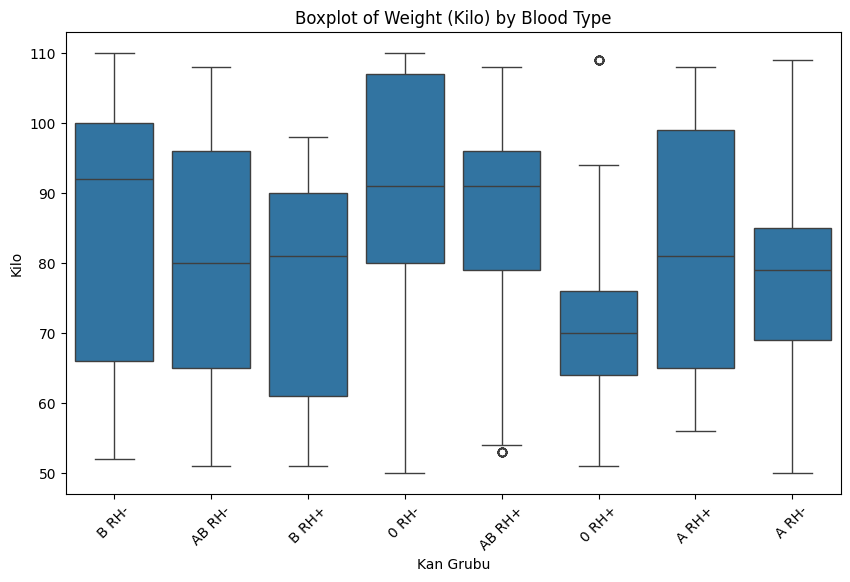

In [8]:
plt.figure(figsize=(10, 6))

# Boxplot for 'Kan Grubu' vs 'Kilo'
sns.boxplot(x='Kan Grubu', y='Kilo', data=df) 

plt.title('Boxplot of Weight (Kilo) by Blood Type')
plt.xticks(rotation=45) 
plt.show()

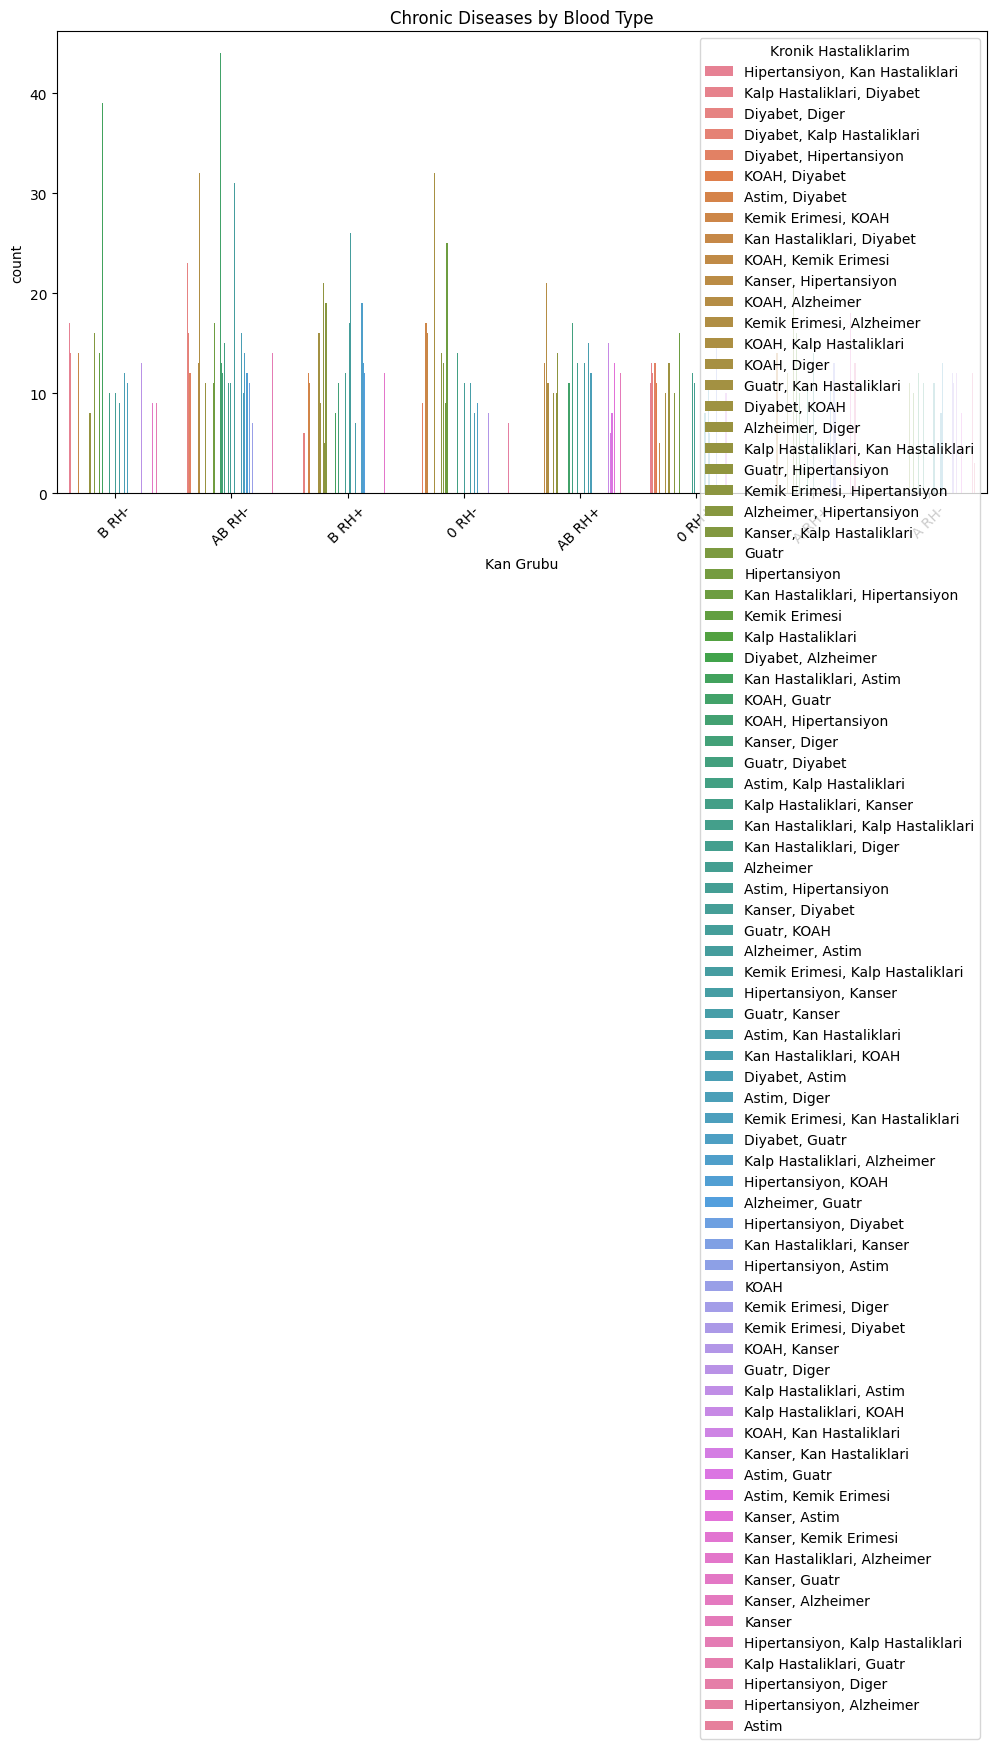

In [9]:
# Bar plot of chronic diseases by blood type
plt.figure(figsize=(12, 6))
sns.countplot(x='Kan Grubu', hue='Kronik Hastaliklarim', data=df)
plt.title('Chronic Diseases by Blood Type')
plt.xticks(rotation=45)
plt.show()


### 9. Side Effects Distribution

We will analyze the frequency of different side effects (`Yan_Etki`) reported in the dataset. Here, we visualize the top 10 most frequent side effects to get an idea of the most common issues reported by users.


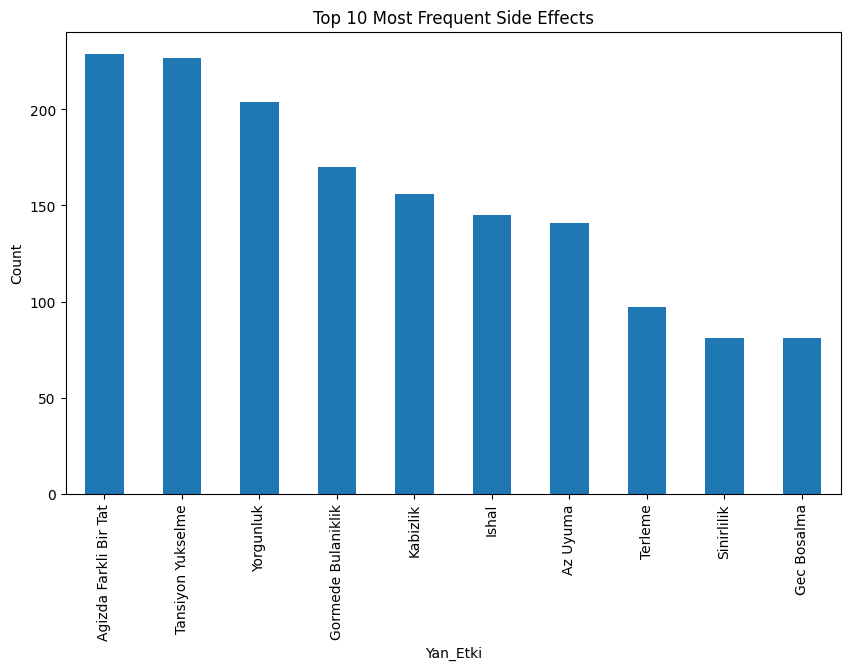

In [10]:
# Plot the top 10 most frequent side effects
plt.figure(figsize=(10, 6))
df['Yan_Etki'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Side Effects')
plt.ylabel('Count')
plt.show()

### 10. Detect Outliers in Numeric Data

We use box plots to detect potential outliers in the numeric columns.


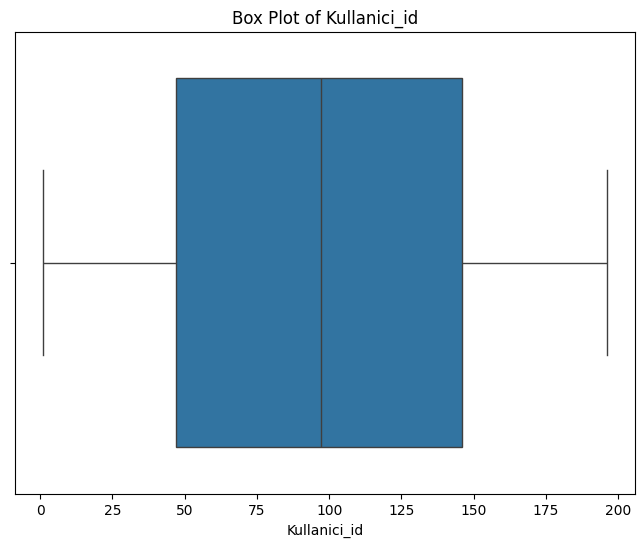

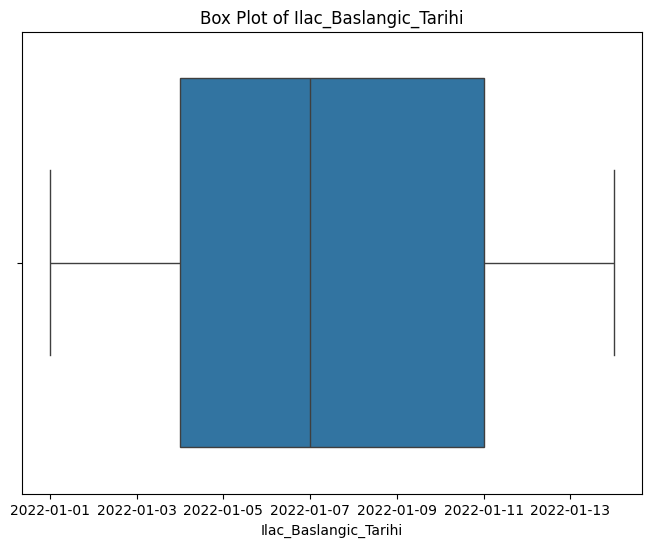

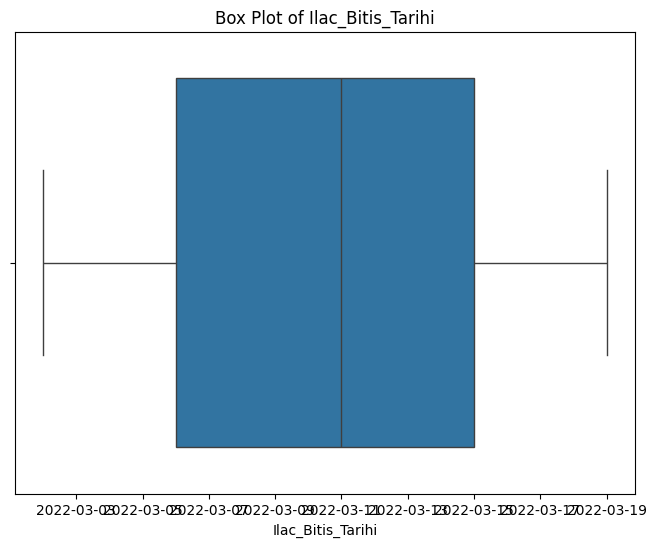

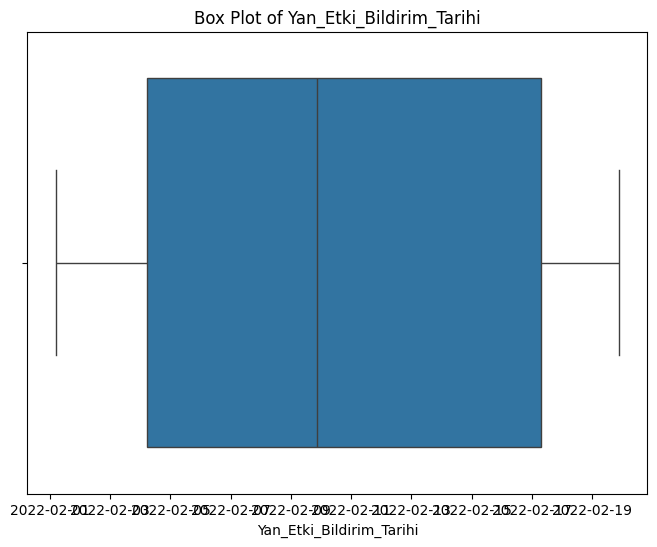

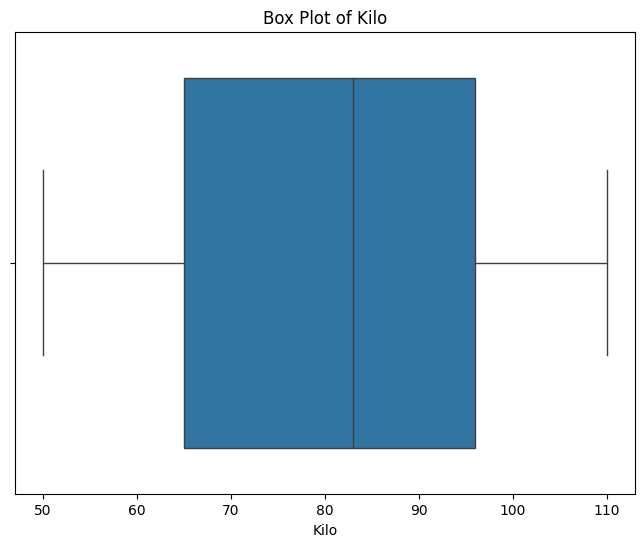

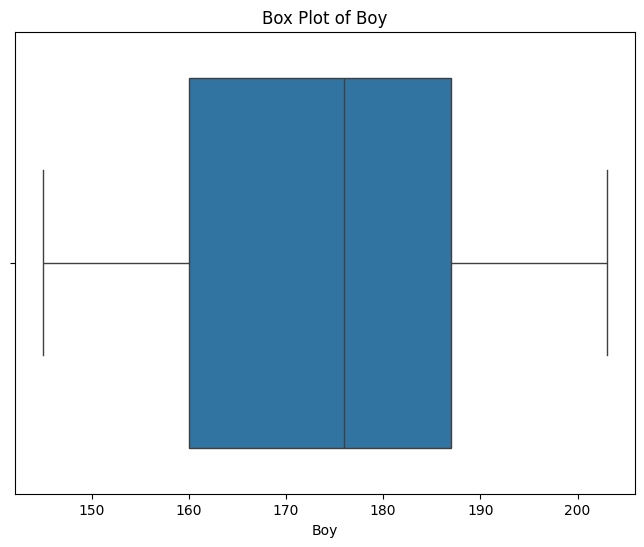

In [11]:
# Detecting outliers using boxplots for each numeric variable
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')
    plt.show()

### 11. Summary of Findings

In this section, we summarize any key findings such as:

Missing Data:

    Cinsiyet: Missing 20% of entries.
    Kan Grubu: Missing 15% of entries.

Outliers:
    
    No significant outlier is detected.

Data Types:
    
    The dataset contains 5 numeric variables and 10 categorical variables.

# Data Preprocessing with KNN and Simple Imputation

1. Encoding categorical variables using **OneHotEncoder**.
2. Handling missing numerical data using **KNNImputer**.
3. Handling missing categorical data using **SimpleImputer** 
4. Normalizing numerical features.
5. Saving the preprocessed dataset to an Excel file.



### 1. Age Distribution

We calculate the age of the users based on their birth dates (`Dogum_Tarihi`) and visualize the distribution of age across the dataset.

In [12]:
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MultiLabelBinarizer, LabelEncoder

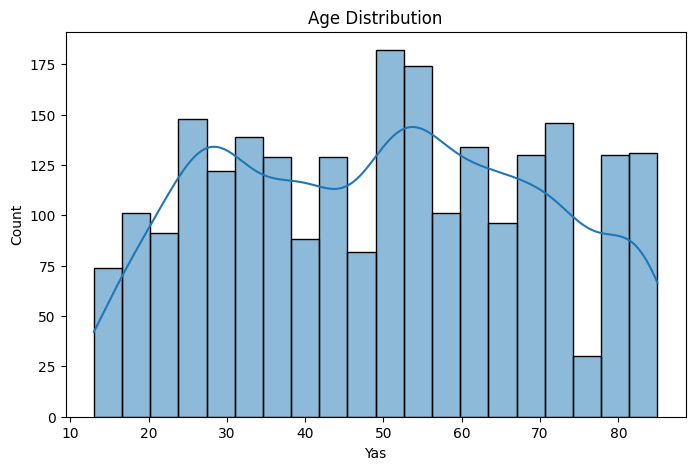

In [13]:
# Define df_encoded as a copy of df to store all encoded variables
df_encoded = df.copy()

# Calculate Age based on 'Dogum_Tarihi'
df_encoded['Yas'] = pd.to_datetime('today').year - df_encoded['Dogum_Tarihi'].dt.year

# Plot the distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df_encoded['Yas'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Yas')
plt.show()

### 1. Date Encoding Techniques

We will extract useful components from the date, calculate time differences. Transform`Ilac_Baslangic_Tarihi`, `Ilac_Bitis_Tarihi`, `Yan_Etki_Bildirim_Tarihi` into `'Ilac_Kullanim_Gün_Sayisi` and `Yan_Etki_Ortaya_Cikma_Suresi_Gun`



In [14]:
# Convert necessary columns to datetime format
df['Ilac_Baslangic_Tarihi'] = pd.to_datetime(df['Ilac_Baslangic_Tarihi'])
df['Ilac_Bitis_Tarihi'] = pd.to_datetime(df['Ilac_Bitis_Tarihi'])
df['Yan_Etki_Bildirim_Tarihi'] = pd.to_datetime(df['Yan_Etki_Bildirim_Tarihi'])

# Step 1: Calculate the duration of medication usage in days
df_encoded['Ilac_Kullanim_Gün_Sayisi'] = (df_encoded['Ilac_Bitis_Tarihi'] - df_encoded['Ilac_Baslangic_Tarihi']).dt.days

# Calculate the number of days between the start of the medication and the side effect report
df_encoded['Yan_Etki_Ortaya_Cikma_Suresi_Gun'] = (df_encoded['Yan_Etki_Bildirim_Tarihi'] - df_encoded['Ilac_Baslangic_Tarihi']).dt.days

# Drop original date columns
df_encoded = df_encoded.drop(columns=['Dogum_Tarihi','Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki_Bildirim_Tarihi'], errors='ignore')

# Display the updated DataFrame
print(df_encoded.head())


   Kullanici_id Cinsiyet    Uyruk         Il                        Ilac_Adi  \
0           107     Male  Turkiye  Canakkale                 trifluoperazine   
1           140     Male  Turkiye    Trabzon                fluphenazine hcl   
2             2   Female  Turkiye  Canakkale                 warfarin sodium   
3            83     Male  Turkiye      Adana                   valproic acid   
4             7   Female  Turkiye      Izmir  carbamazepine extended release   

                Yan_Etki Alerjilerim             Kronik Hastaliklarim  \
0               Kabizlik       Ceviz  Hipertansiyon, Kan Hastaliklari   
1              Yorgunluk         Toz                              NaN   
2               Carpinti         Muz       Kalp Hastaliklari, Diyabet   
3             Sinirlilik      Pancar                   Diyabet, Diger   
4  Agizda Farkli Bir Tat         NaN       Diyabet, Kalp Hastaliklari   

   Baba Kronik Hastaliklari          Anne Kronik Hastaliklari  \
0      Guatr, H

### 1. Encoding Nominal Categorical Variables using `OneHotEncoder`

**OneHotEncoder**: For nominal features, converts each category into a binary column.


In [15]:
# Importing necessary libraries
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MultiLabelBinarizer, LabelEncoder


In [16]:
# Categorical columns to encode 
cat_cols = ['Cinsiyet', 'Kan Grubu', 'Uyruk', 'Yan_Etki','Il', 'Alerjilerim']

# Using OneHotEncoder for nominal categorical variables
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
df_encoded = pd.get_dummies(df_encoded, columns=cat_cols, drop_first=True)

# Check the first few rows after encoding
df_encoded.head()


,Kullanici_id,Ilac_Adi,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kilo,Boy,Yas,...,Alerjilerim_Kolali Icecek,Alerjilerim_Kopek,Alerjilerim_Laktoz,Alerjilerim_Lateks,Alerjilerim_Muz,Alerjilerim_Pancar,Alerjilerim_Sari Kantaron,Alerjilerim_Sut,Alerjilerim_Toz,Alerjilerim_Yogurt
0,107,trifluoperazine,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",103.0,191.0,64,...,False,False,False,False,False,False,False,False,False,False
1,140,fluphenazine hcl,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",81.0,181.0,85,...,False,False,False,False,False,False,False,False,True,False
2,2,warfarin sodium,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,93.0,158.0,48,...,False,False,False,False,True,False,False,False,False,False
3,83,valproic acid,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",NaN,165.0,47,...,False,False,False,False,False,True,False,False,False,False
4,7,carbamazepine extended release,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",99.0,172.0,48,...,False,False,False,False,False,False,False,False,False,False


### 2. Encoding Multi-lebel Categorical Variables using Multi-label Binarization

To apply multi-label binarization, we can focus on the columns containing multiple labels (Kronik Hastaliklarim, Baba Kronik Hastaliklari, etc.) and transform these into a binary format.

In [21]:
# Columns that have multiple labels
multi_label_columns = [
    'Kronik Hastaliklarim', 'Baba Kronik Hastaliklari', 
    'Anne Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari', 
    'Erkek Kardes Kronik Hastaliklari'
]

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Loop through each multi-label column, apply the MultiLabelBinarizer, 
# and concatenate the binarized columns to the df_encoded DataFrame
for col in multi_label_columns:
    # Split the entries by ', ' to create a list of labels, and handle NaN values by converting them to empty lists
    binarized_col = mlb.fit_transform(df_encoded[col].fillna('').apply(lambda x: x.split(', ') if x else []))
    
    # Create a DataFrame with the binarized columns, naming each column based on the label class
    binarized_df = pd.DataFrame(binarized_col, columns=[f"{col}_{cls}" for cls in mlb.classes_])
    
    # Concatenate the binarized DataFrame to df_encoded
    df_encoded = pd.concat([df_encoded, binarized_df], axis=1)


# Drop original columns
df_encoded = df_encoded.drop(columns=['Kronik Hastaliklarim', 'Baba Kronik Hastaliklari', 
    'Anne Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari', 
    'Erkek Kardes Kronik Hastaliklari'], errors='ignore')

# Check the first few rows after all encoding steps
print(df_encoded.head())

   Kullanici_id                        Ilac_Adi      Kilo       Boy  Yas  \
0           107                 trifluoperazine  0.883333  0.793103   64   
1           140                fluphenazine hcl  0.516667  0.620690   85   
2             2                 warfarin sodium  0.716667  0.224138   48   
3            83                   valproic acid  0.860000  0.344828   47   
4             7  carbamazepine extended release  0.816667  0.465517   48   

   Ilac_Kullanim_Gün_Sayisi  Yan_Etki_Ortaya_Cikma_Suresi_Gun  Cinsiyet_Male  \
0                        54                                41           True   
1                        58                                25           True   
2                        60                                24          False   
3                        67                                35           True   
4                        52                                30          False   

   Cinsiyet_Unknown  Kan Grubu_0 RH-  ...  \
0             Fal

### 2. Handling Missing Numerical Data using `KNNImputer`


In [22]:
# KNNImputer for numerical columns
num_cols = ['Kilo', 'Boy'] 
knn_imputer = KNNImputer(n_neighbors=5)  # Using 5 nearest neighbors

# Apply KNNImputer to numerical columns
df_encoded[num_cols] = knn_imputer.fit_transform(df_encoded[num_cols])

# Check if missing values are handled
df_encoded[num_cols].isnull().sum()


Kilo    0
Boy     0
dtype: int64

### 3. Normalizing Numerical Features

We will normalize the numerical features using Min-Max Scaling to bring the values into a range between 0 and 1.


In [25]:
# Select numerical columns for normalization
numerical_cols = ['Kilo', 'Boy']  # Add other relevant numerical columns

# Initialize MinMaxScaler for normalization
scaler = MinMaxScaler()

# Apply MinMaxScaler to the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows after normalization
df_encoded


,Kullanici_id,Ilac_Adi,Kilo,Boy,Yas,Ilac_Kullanim_Gün_Sayisi,Yan_Etki_Ortaya_Cikma_Suresi_Gun,Cinsiyet_Male,Cinsiyet_Unknown,Kan Grubu_0 RH-,...,Erkek Kardes Kronik Hastaliklari_Astim,Erkek Kardes Kronik Hastaliklari_Diger,Erkek Kardes Kronik Hastaliklari_Diyabet,Erkek Kardes Kronik Hastaliklari_Guatr,Erkek Kardes Kronik Hastaliklari_Hipertansiyon,Erkek Kardes Kronik Hastaliklari_KOAH,Erkek Kardes Kronik Hastaliklari_Kalp Hastaliklari,Erkek Kardes Kronik Hastaliklari_Kan Hastaliklari,Erkek Kardes Kronik Hastaliklari_Kanser,Erkek Kardes Kronik Hastaliklari_Kemik Erimesi
0,107,trifluoperazine,0.883333,0.793103,64,54,41,True,False,False,...,0,0,0,1,0,0,0,0,0,1
1,140,fluphenazine hcl,0.516667,0.620690,85,58,25,True,False,False,...,0,0,1,0,0,1,0,0,0,0
2,2,warfarin sodium,0.716667,0.224138,48,60,24,False,False,False,...,0,1,0,0,0,0,0,0,0,0
3,83,valproic acid,0.860000,0.344828,47,67,35,True,False,False,...,0,0,0,0,0,0,1,0,1,0
4,7,carbamazepine extended release,0.816667,0.465517,48,52,30,False,False,False,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,9,"desoximetasone spray, non-aerosol",0.000000,0.120690,67,50,30,False,True,False,...,0,0,0,0,0,1,0,1,0,0
2353,101,olanzapine-fluoxetine,0.210000,0.568966,20,62,48,False,False,False,...,1,0,1,0,0,0,0,0,0,0
2354,127,trazodone,0.666667,1.000000,73,69,32,False,False,False,...,0,1,0,0,0,0,1,0,0,0
2355,178,duloxetine hydrochloride,0.666667,0.672414,44,65,33,True,False,False,...,1,0,0,0,0,1,0,0,0,0


### 4. Verify that Missing Values are Handled

We verify that all missing values have been successfully imputed by checking the dataset again for any remaining missing values.


In [24]:
# Verify that missing values have been handled
missing_data_after_imputation = df_encoded.isnull().sum()
print("Missing Data After Imputation:\n", missing_data_after_imputation)

Missing Data After Imputation:
 Kullanici_id                                          0
Ilac_Adi                                              0
Kilo                                                  0
Boy                                                   0
Yas                                                   0
                                                     ..
Erkek Kardes Kronik Hastaliklari_KOAH                 0
Erkek Kardes Kronik Hastaliklari_Kalp Hastaliklari    0
Erkek Kardes Kronik Hastaliklari_Kan Hastaliklari     0
Erkek Kardes Kronik Hastaliklari_Kanser               0
Erkek Kardes Kronik Hastaliklari_Kemik Erimesi        0
Length: 194, dtype: int64


### 5. Data Visualizations after Handling Missing Data
We visualize the correlation between features using a heatmap.


In [26]:
# Selecting numeric columns for correlation analysis
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64', 'datetime64']).drop(columns=['Dogum_Tarihi'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

KeyError: "['Dogum_Tarihi'] not found in axis"

### 6. Side Effects by Gender after Handling Missing Data

Lastly, we explore how side effects are distributed across different genders. This can help us identify if certain side effects are more common in one gender compared to others.


In [27]:
# Create a count plot to visualize side effects by gender
plt.figure(figsize=(10, 6))

# Plot for Side Effects by Gender
sns.countplot(x='Cinsiyet', hue='Yan_Etki', data=df_encoded)

# Adding labels and title
plt.title('Distribution of Side Effects by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Side Effects')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

ValueError: Could not interpret value `Cinsiyet` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [28]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Now display the DataFrame with all columns visible
print(df_encoded.head())  # You can also use just df.head() or df to see a portion of the data with all columns

   Kullanici_id                        Ilac_Adi      Kilo       Boy  Yas  \
0           107                 trifluoperazine  0.883333  0.793103   64   
1           140                fluphenazine hcl  0.516667  0.620690   85   
2             2                 warfarin sodium  0.716667  0.224138   48   
3            83                   valproic acid  0.860000  0.344828   47   
4             7  carbamazepine extended release  0.816667  0.465517   48   

   Ilac_Kullanim_Gün_Sayisi  Yan_Etki_Ortaya_Cikma_Suresi_Gun  Cinsiyet_Male  \
0                        54                                41           True   
1                        58                                25           True   
2                        60                                24          False   
3                        67                                35           True   
4                        52                                30          False   

   Cinsiyet_Unknown  Kan Grubu_0 RH-  Kan Grubu_A RH+  Kan Gru

### 7. Save the Encoded and Normalized Dataset to an Excel File

We will now save the preprocessed dataset to an Excel file.


In [29]:
# Saving the encoded and normalized dataset to an Excel file
df_encoded.to_excel('preprocessed_dataset.xlsx', index=False)

print("Dataset has been saved successfully!")


Dataset has been saved successfully!
